In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import tabulate

In [5]:
df = pd.read_csv("data.csv", index_col=0, delimiter=";")
df

,S1,S2,S3,W1,W2,W3,W4,W5
#,,,,,,,,
1,20,46,30,44,38,37,28,29
27,13,14,50,49,42,30,19,39
36,13,31,55,42,33,12,13,12
40,15,24,40,42,31,18,21,20
48,16,22,39,44,38,13,28,14
...,...,...,...,...,...,...,...,...
942,14,44,54,38,40,39,32,32
958,17,28,43,39,30,18,21,16
960,17,13,32,45,33,28,16,34


In [6]:
df.describe()

,S1,S2,S3,W1,W2,W3,W4,W5
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,18.622222,27.544444,36.733333,40.233333,34.977778,24.388889,23.011111,26.277778
std,7.272509,10.637184,10.293229,5.348632,7.565412,9.246553,7.297059,7.410936
min,5.000000,8.000000,13.000000,23.000000,11.000000,10.000000,9.000000,11.000000
25%,13.000000,19.000000,31.000000,38.000000,30.000000,17.000000,17.250000,21.000000
50%,17.000000,26.500000,36.000000,39.500000,35.000000,24.000000,22.500000,27.000000
75%,23.750000,35.000000,43.000000,44.000000,40.750000,30.000000,29.000000,32.000000
max,35.000000,52.000000,60.000000,50.000000,55.000000,47.000000,40.000000,45.000000


Shape of your Data Set loaded: (90, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    9 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 36


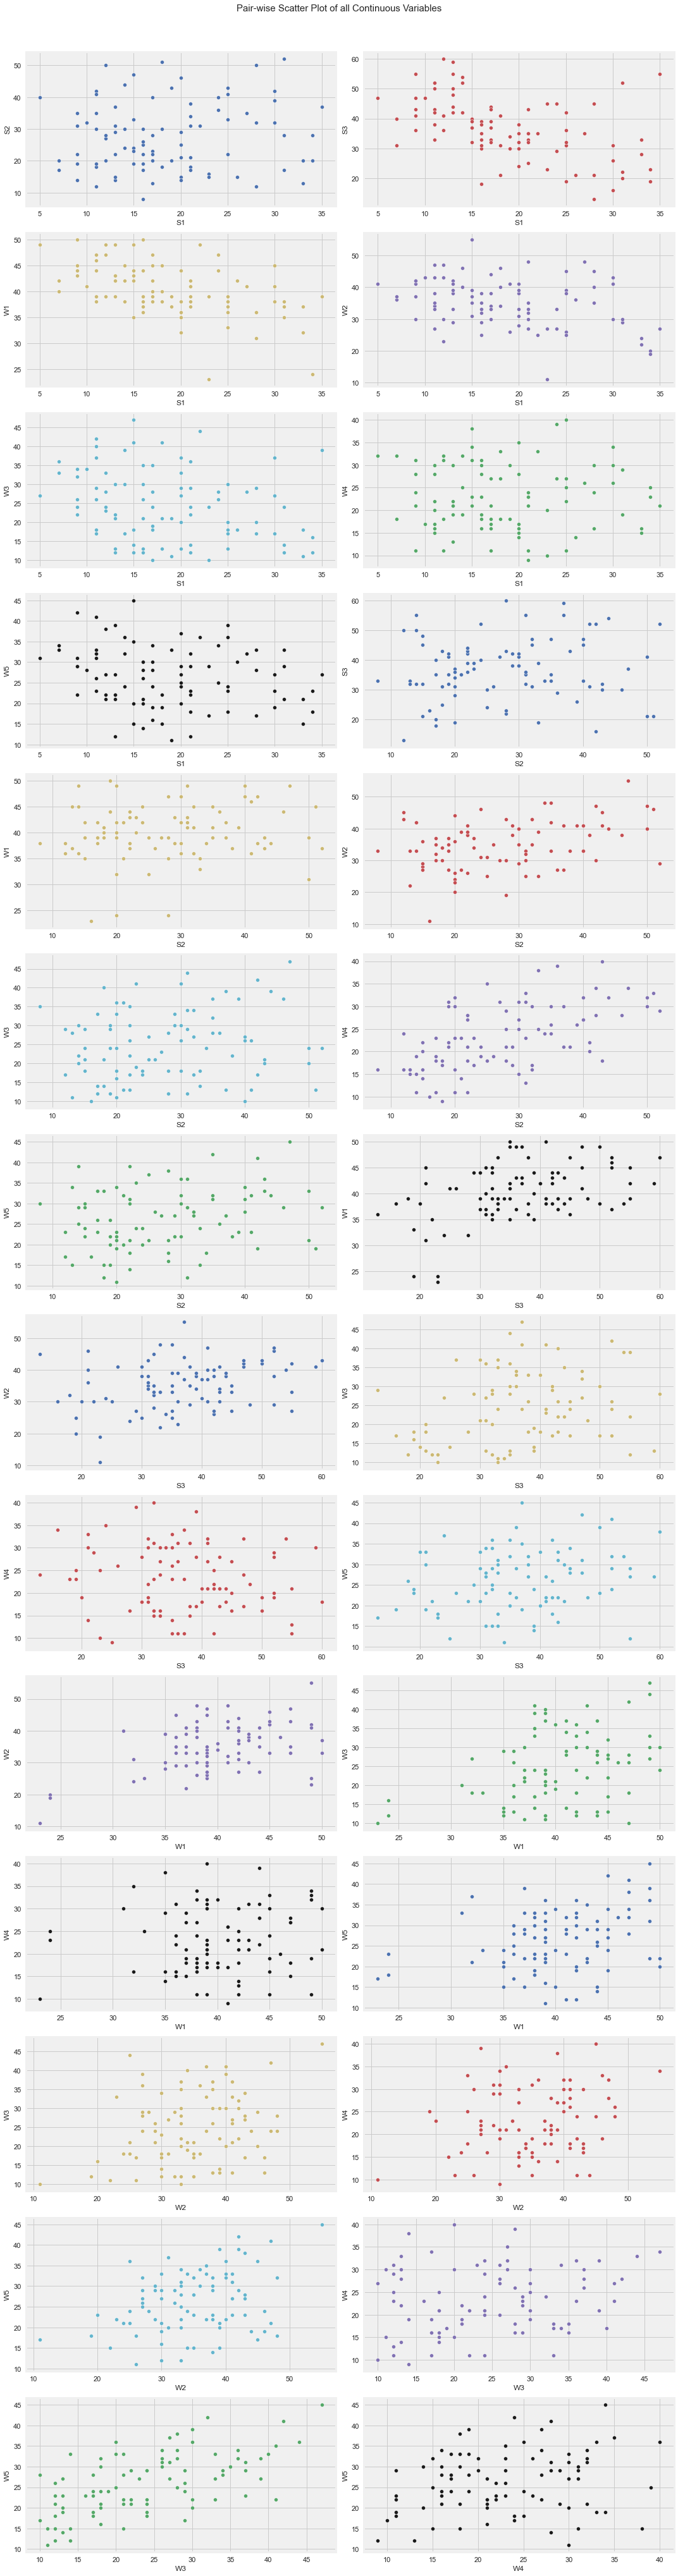

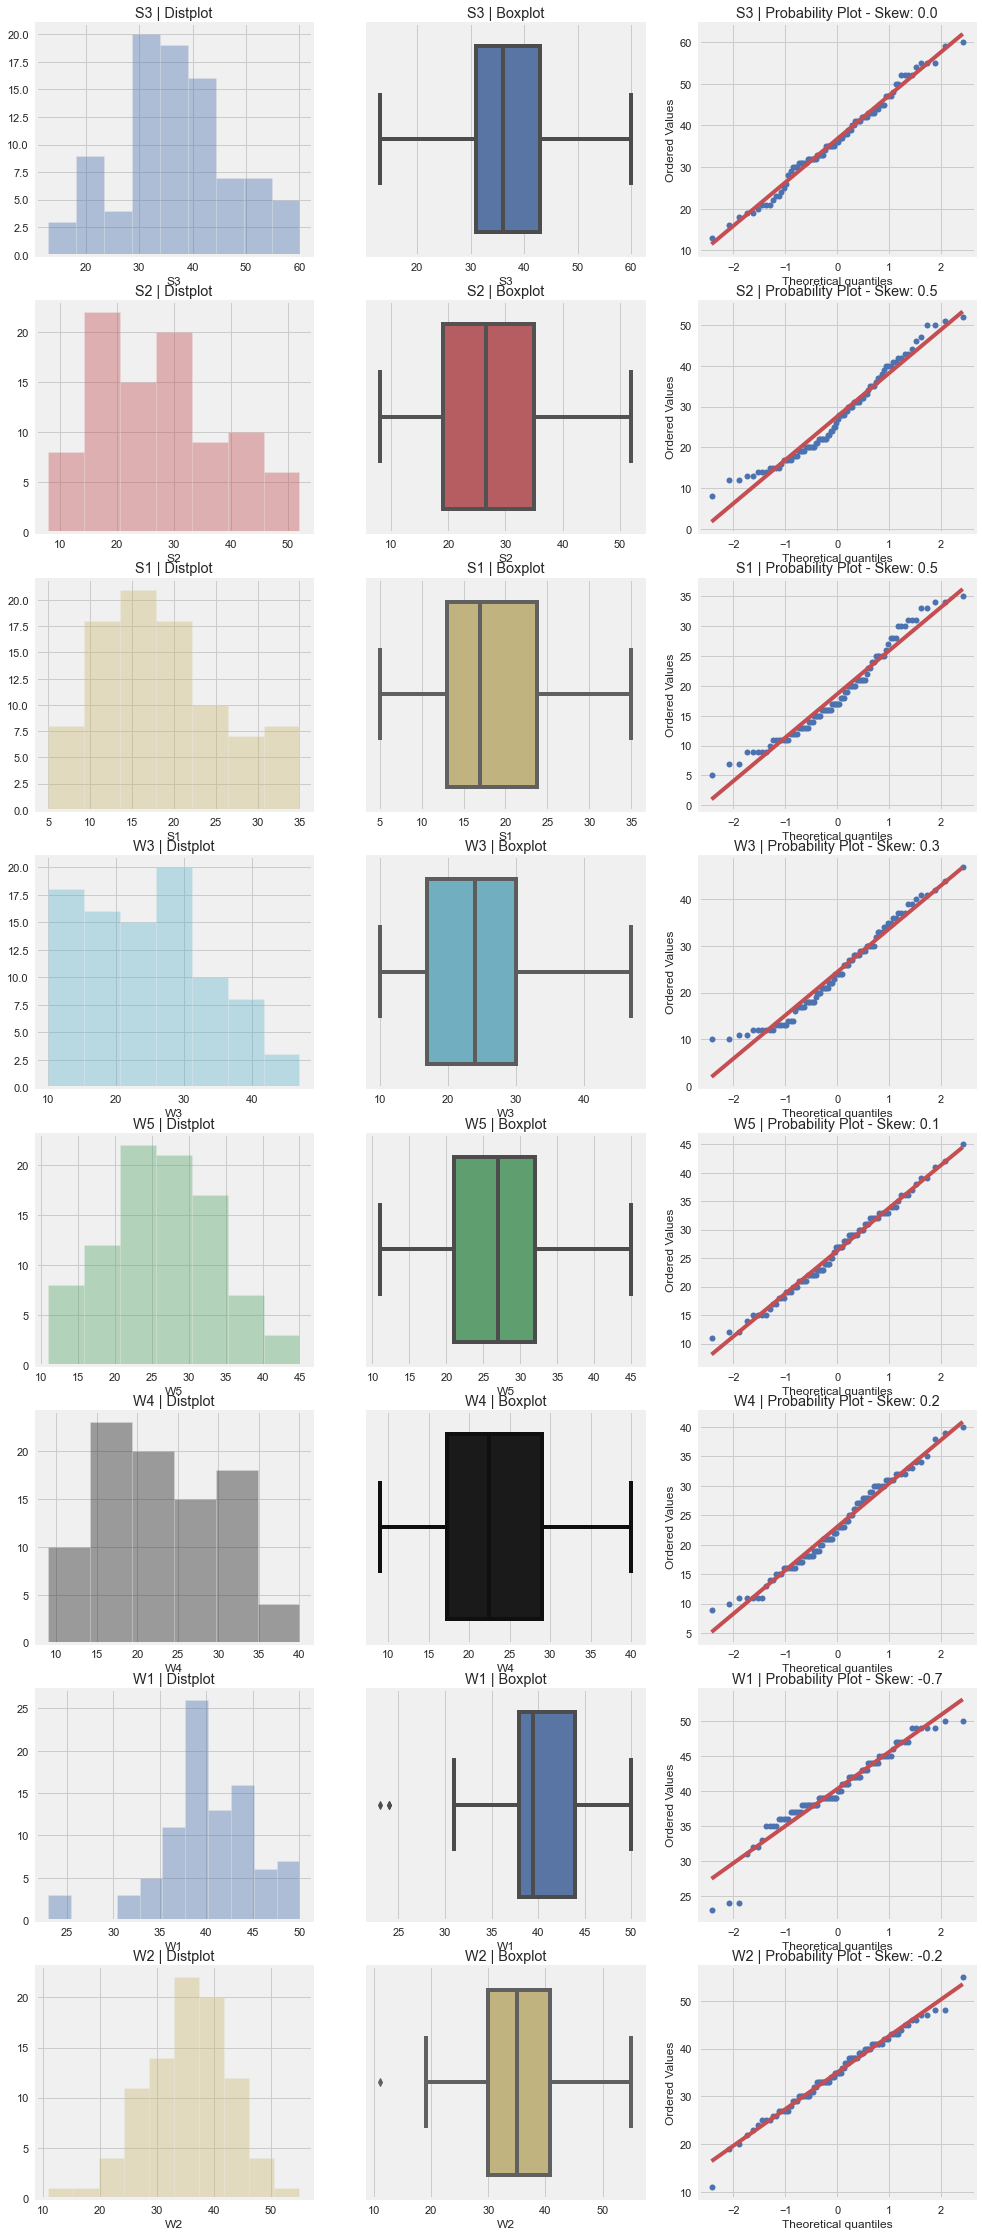

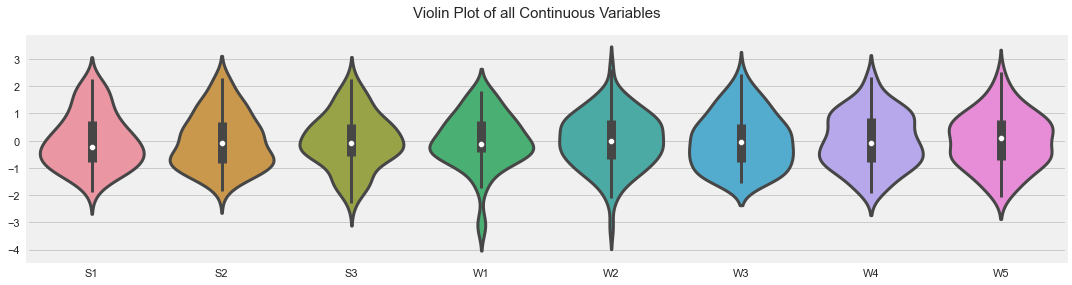

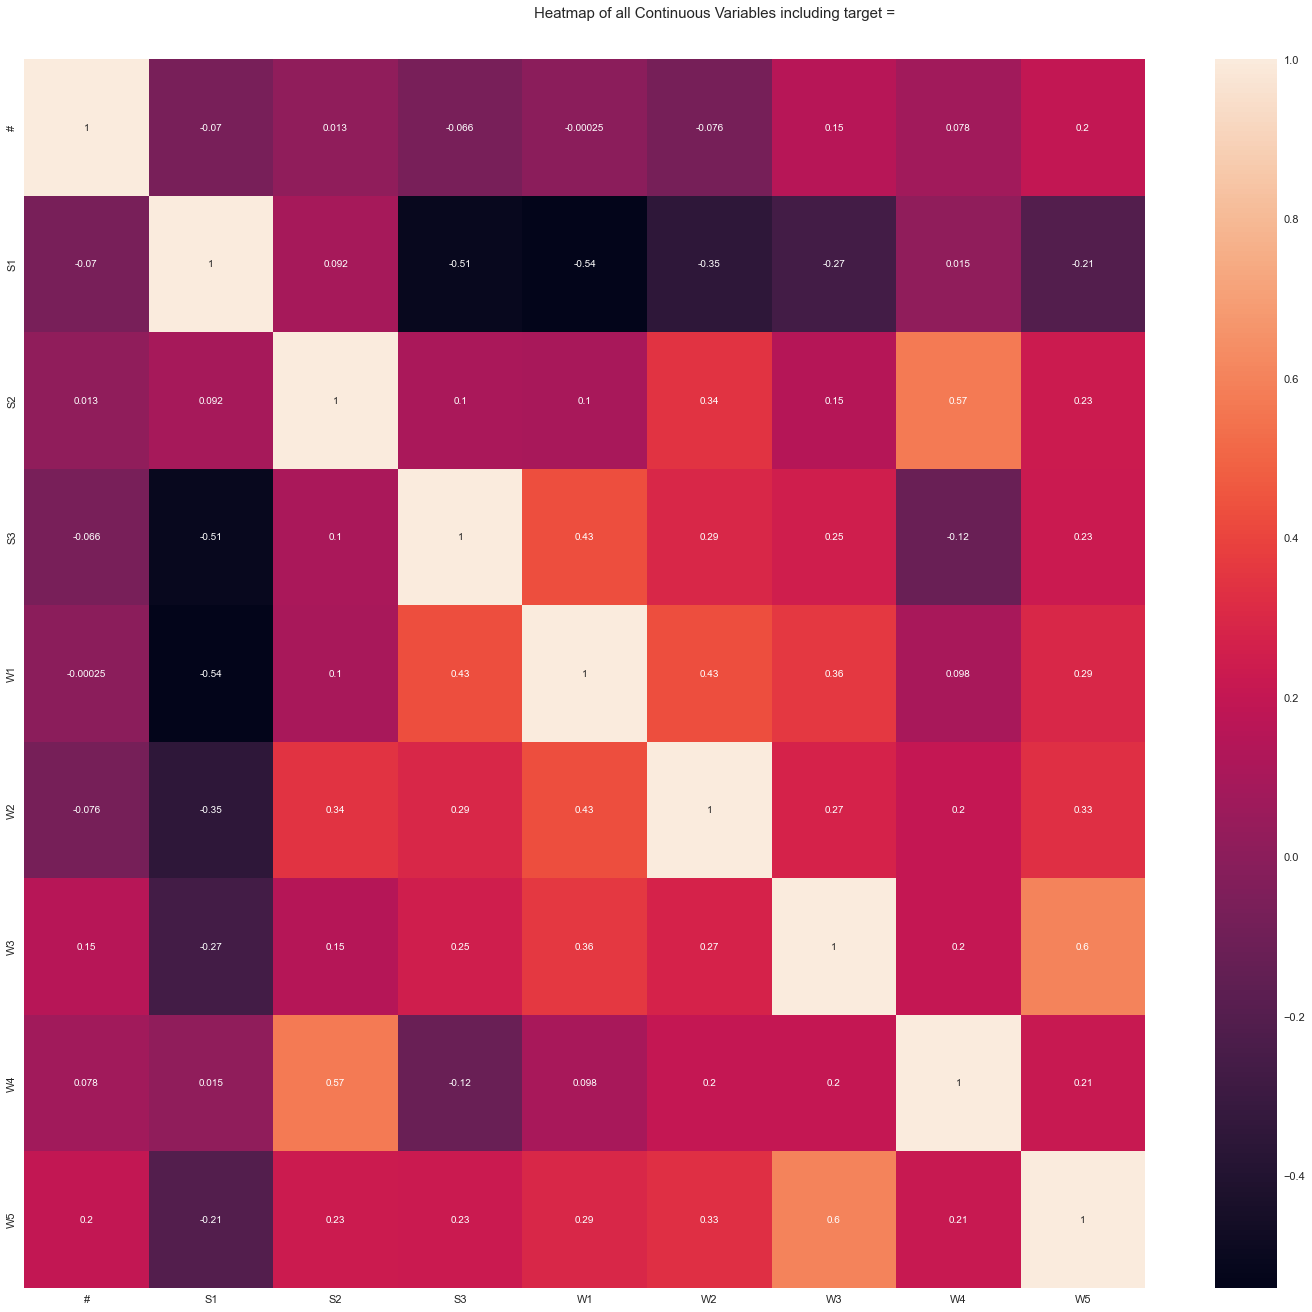

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [3]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
dfte = AV.AutoViz("data.csv", sep=";")

Statistical tests scipy: https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests


# Úkol 9: Bonferroniho korekce
Student ve své diplomové práci popisuje tři strategie, které lidé používají v interpersonálním kontaktu, a hledá jejich souvislost s životní spokojeností. Preferenci jednotlivých strategií (S1, S2, S3) měří pomocí dotazníku vlastní výroby. Kromě toho každého respondenta nechal vyplnit dotazník mapující životní spokojenost v pěti oblastech života (W1, W2, W3, W5, W5).

Autor práce vyřkl velmi obecnou hypotézu: Výsledky škál dotazníku strategie interpersonálního kontaktu souvisí s výsledky dotazníku životní spokojenosti.

Vypočítejte hodnoty Pearsonova korelačního koeficientu pro všechny dvojice škál S a W. U sledovaných veličin předpokládejme normální rozdělení.

=====================================================

Kolik nalezených korelačních koeficientů se signifikantně liší od nuly při 5% hladině významnosti (bez provedení korekce)? (3 body)

Kolik nalezených korelačních koeficientů se signifikantně liší od nuly, pokud pomocí Bonferroniho korekce upravíme hladinu významnosti tak, aby hladina alfa pro celkovou hypotézu nepřesáhla 5 %? (5 bodů)

Kolik nalezených korelačních koeficientů se signifikantně liší od nuly, pokud pomocí Bonferroniho korekce upravíme hladinu významnosti tak, aby hladina alfa pro celkovou hypotézu nepřesáhla 1 %? (5 bodů)

In [15]:
interpersonal_strategies = ["S1", "S2", "S3"]
life_satisfactions = ["W1", "W2", "W3", "W4", "W5"]

task_1_alpha = 0.05

task_2_alpha = 0.05
task_2_alpha_correction = task_2_alpha / len(interpersonal_strategies) / len(life_satisfactions)

task_3_alpha = 0.01
task_3_alpha_correction = task_3_alpha / len(interpersonal_strategies) / len(life_satisfactions)

count_task_1 = 0
count_task_2 = 0
count_task_3 = 0

for ip_strategy in interpersonal_strategies:
    for life_satisfaction in life_satisfactions:
        
        print(f"==== {ip_strategy}-{life_satisfaction} ====")
        s = df[ip_strategy]
        w = df[life_satisfaction]
        
        # task 1
        pearson_r, p_value = stats.pearsonr(s, w)
        print(f"{pearson_r=}, {p_value=}")
        
        if p_value < task_1_alpha:
            count_task_1 += 1
            
        # task 2, bonferroniho korekce
        if p_value < task_2_alpha_correction:
            count_task_2 += 1
        
        # task 3
        if p_value < task_3_alpha_correction:
            count_task_3 += 1
        
        

print("==== Summary ====")
print(f"Task 1: sum(p_value < {task_1_alpha}) = {count_task_1}")
print(f"Task 2: sum(p_value < {task_2_alpha} ({task_2_alpha_correction})) = {count_task_2}")
print(f"Task 3: sum(p_value < {task_3_alpha} ({task_3_alpha_correction})) = {count_task_3}")

==== S1-W1 ====
pearson_r=-0.5404708283855963, p_value=3.830111803983687e-08
==== S1-W2 ====
pearson_r=-0.34916216089683627, p_value=0.0007436508335629529
==== S1-W3 ====
pearson_r=-0.265633140494151, p_value=0.011392395955680484
==== S1-W4 ====
pearson_r=0.015324387467515358, p_value=0.8860089409303581
==== S1-W5 ====
pearson_r=-0.2073393371550132, p_value=0.04989504076054504
==== S2-W1 ====
pearson_r=0.09984332145356997, p_value=0.3491193436188301
==== S2-W2 ====
pearson_r=0.3395706800771753, p_value=0.001059292757750463
==== S2-W3 ====
pearson_r=0.14952872862515454, p_value=0.1595321560353869
==== S2-W4 ====
pearson_r=0.5667842454454443, p_value=5.764605948536288e-09
==== S2-W5 ====
pearson_r=0.2310986680546096, p_value=0.028415232311411694
==== S3-W1 ====
pearson_r=0.42850135579516907, p_value=2.5153505143926757e-05
==== S3-W2 ====
pearson_r=0.2913818377719988, p_value=0.005329938016178363
==== S3-W3 ====
pearson_r=0.25361803989418374, p_value=0.015866320605856625
==== S3-W4 ====
p

(Skripta, str. 117)